# student ids:

160363,

Load libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Data/greenhouse-gas-emissions.xlsx"
variables = pd.read_excel(file_path, sheet_name=1)   # variable descriptions
df = pd.read_excel(file_path, sheet_name=2)           # emission data

## Question 1
### Exploratory Data Analysis (EDA)
The provided dataset contains UK territorial greenhouse gas emissions by source and activity, cover-
ing the period from 1990 onwards. Emissions are attributed to the sector that emits them directly
and include indicators related to UK territorial totals, international aviation and shipping, and Paris
Agreement coverage.
Perform Exploratory Data Analysis (EDA) to investigate the key factors driving changes in UK
greenhouse gas emissions over time.
1. Write a Python program to perform a covariance- and correlation-based analysis to examine
relationships between emissions, sources, and activities across years. Do not use any built-in
covariance or correlation functions. You must implement your calculations.
2. Write another Python program to visualise your findings from the previous step and briefly
explain the observed emission patterns. Hints: You may consider using histograms, boxplots,
and scatterplots.

Inspect the dataset dimensions, year range, and column types.

In [2]:
# --- Initial EDA ---
print("Shape:", df.shape)
print("Year range:", df["Year"].min(), "to", df["Year"].max())
print("Unique years:", df["Year"].nunique())
print()

# Column types
df.info()

Shape: (78022, 15)
Year range: 1990 to 2024
Unique years: 35

<class 'pandas.DataFrame'>
RangeIndex: 78022 entries, 0 to 78021
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Included in UK territorial total            78022 non-null  str    
 1   GHG                                         78022 non-null  str    
 2   GHG grouped                                 78022 non-null  str    
 3   CRT category                                78022 non-null  str    
 4   CRT category description                    78022 non-null  str    
 5   Year                                        78022 non-null  int64  
 6   Territory name                              78022 non-null  str    
 7   Territorial Emissions Statistics sector     78022 non-null  str    
 8   Territorial Emissions Statistics subsector  78022 non-null  str    
 9   Territorial Emissions Statistics

Check for missing values and view summary statistics.

In [3]:
# Missing values
print("Missing values per column:")
print(df.isna().sum())
print()

# Summary stats for numeric columns
df.describe()

Missing values per column:
Included in UK territorial total              0
GHG                                           0
GHG grouped                                   0
CRT category                                  0
CRT category description                      0
Year                                          0
Territory name                                0
Territorial Emissions Statistics sector       0
Territorial Emissions Statistics subsector    0
Territorial Emissions Statistics category     0
Source                                        0
Fuel group                                    0
Fuel                                          0
Activity                                      0
Emissions (MtCO2e)                            0
dtype: int64



,Year,Emissions (MtCO2e)
count,78022.000000,78022.000000
mean,2007.771295,0.293069
std,9.982078,3.036902
min,1990.000000,-18.002028
25%,1999.000000,0.000124
50%,2008.000000,0.002087
75%,2016.000000,0.026358
max,2024.000000,184.014756


Count unique values in each categorical column.

In [4]:
# Categorical column overview
cat_cols = [
    "Territorial Emissions Statistics sector",
    "Territorial Emissions Statistics subsector",
    "Source",
    "Fuel group",
    "Activity",
    "GHG grouped"
]

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Territorial Emissions Statistics sector: 9 unique values
Territorial Emissions Statistics subsector: 28 unique values
Source: 700 unique values
Fuel group: 5 unique values
Activity: 221 unique values
GHG grouped: 7 unique values


Examine the distribution of emissions, including negative values from carbon sinks.

In [5]:
# Emission distribution
print("Emissions (MtCO2e) summary:")
print(f"  Min:    {df['Emissions (MtCO2e)'].min():.4f}")
print(f"  Max:    {df['Emissions (MtCO2e)'].max():.4f}")
print(f"  Mean:   {df['Emissions (MtCO2e)'].mean():.4f}")
print(f"  Median: {df['Emissions (MtCO2e)'].median():.6f}")
print()

# Note negative values (carbon sinks like LULUCF)
neg = df[df["Emissions (MtCO2e)"] < 0]
print(f"Rows with negative emissions: {len(neg)} ({len(neg)/len(df)*100:.1f}%)")
print(f"These come from sectors: {neg['Territorial Emissions Statistics sector'].unique().tolist()}")

Emissions (MtCO2e) summary:
  Min:    -18.0020
  Max:    184.0148
  Mean:   0.2931
  Median: 0.002087

Rows with negative emissions: 3310 (4.2%)
These come from sectors: ['LULUCF']


Filter to UK territorial emissions only, excluding international aviation and shipping.

In [6]:
# Remove non-UK territorial emissions
territorial = df[df["Included in UK territorial total"].str.lower() == "yes"].copy()

Aggregate emissions by year and sector.

In [7]:
# aggregate by year and sectors
SECTOR_COL = "Territorial Emissions Statistics sector"

sector_year = (
    territorial
    .groupby(["Year", SECTOR_COL], as_index=False)["Emissions (MtCO2e)"]
    .sum()
)

Pivot to wide format with years as rows and sectors as columns.

In [8]:
# pivot to wide format (rows - years, columns - sectors)

pivot = (
    sector_year
    .pivot(index="Year", columns=SECTOR_COL, values="Emissions (MtCO2e)")
    .fillna(0.0)
    .sort_index()
)

print("Shape:", pivot.shape)
pivot.head()

Shape: (35, 8)


Territorial Emissions Statistics sector,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Year,,,,,,,,
1990,54.988754,109.492561,124.191169,203.990902,77.192227,155.662400,10.266883,55.039201
1991,54.800121,121.292199,122.552535,200.562839,78.080868,156.665141,9.772005,56.836696
1992,54.457877,117.743777,123.850246,188.466186,79.240850,149.650442,8.962862,58.000423
1993,53.561508,121.671071,124.995984,170.963203,78.927561,143.356940,8.401128,59.475666
1994,54.320493,116.627834,125.175291,166.731982,71.448923,145.437790,7.925957,60.982346


Define manual statistical functions for mean, covariance, standard deviation, and correlation without using built-in functions.

In [9]:
def mean(xs):
    xs = list(xs)
    return sum(xs) / len(xs)

def covariance(xs, ys, ddof=1):
    xs, ys = list(xs), list(ys)
    n = len(xs)
    mx, my = mean(xs), mean(ys)
    return sum((x - mx) * (y - my) for x, y in zip(xs, ys)) / (n - ddof)

def std(xs, ddof=1):
    xs = list(xs)
    n = len(xs)
    m = mean(xs)
    return math.sqrt(sum((x - m) ** 2 for x in xs) / (n - ddof))

def correlation(xs, ys):
    sx, sy = std(xs), std(ys)
    if sx == 0 or sy == 0:
        return float("nan")
    return covariance(xs, ys) / (sx * sy)

Compute pairwise covariance and correlation matrices across all sectors.

In [10]:
# --- Step 5: Build covariance and correlation matrices ---

sectors = pivot.columns.tolist()

cov_matrix = pd.DataFrame(index=sectors, columns=sectors, dtype=float)
corr_matrix = pd.DataFrame(index=sectors, columns=sectors, dtype=float)

for s1 in sectors:
    for s2 in sectors:
        cov_matrix.loc[s1, s2] = covariance(pivot[s1].values, pivot[s2].values)
        corr_matrix.loc[s1, s2] = correlation(pivot[s1].values, pivot[s2].values)

print("Covariance matrix:")
display(cov_matrix.round(2))

print("\nCorrelation matrix:")
display(corr_matrix.round(3))

Covariance matrix:


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,7.29,28.16,11.57,99.48,41.04,89.26,8.15,38.83
Buildings and product uses,28.16,173.11,67.56,575.03,181.78,373.71,31.81,193.37
Domestic transport,11.57,67.56,58.91,268.73,65.55,132.82,8.32,78.62
Electricity supply,99.48,575.03,268.73,2564.24,677.64,1408.67,118.14,677.31
Fuel supply,41.04,181.78,65.55,677.64,268.90,567.09,54.18,256.58
Industry,89.26,373.71,132.82,1408.67,567.09,1231.17,117.08,538.61
LULUCF,8.15,31.81,8.32,118.14,54.18,117.08,12.10,49.70
Waste,38.83,193.37,78.62,677.31,256.58,538.61,49.70,277.05



Correlation matrix:


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,1.000,0.793,0.558,0.728,0.927,0.942,0.867,0.864
Buildings and product uses,0.793,1.000,0.669,0.863,0.843,0.810,0.695,0.883
Domestic transport,0.558,0.669,1.000,0.691,0.521,0.493,0.312,0.615
Electricity supply,0.728,0.863,0.691,1.000,0.816,0.793,0.671,0.804
Fuel supply,0.927,0.843,0.521,0.816,1.000,0.986,0.950,0.940
Industry,0.942,0.810,0.493,0.793,0.986,1.000,0.959,0.922
LULUCF,0.867,0.695,0.312,0.671,0.950,0.959,1.000,0.858
Waste,0.864,0.883,0.615,0.804,0.940,0.922,0.858,1.000


Visualise covariance and correlation matrices as heatmaps.

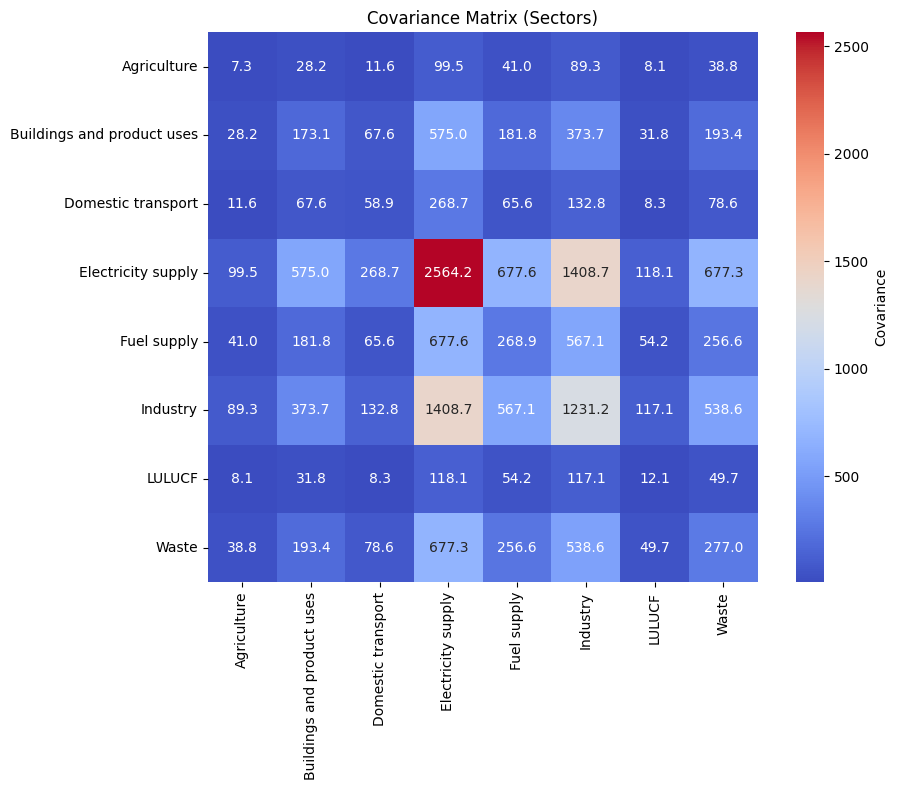

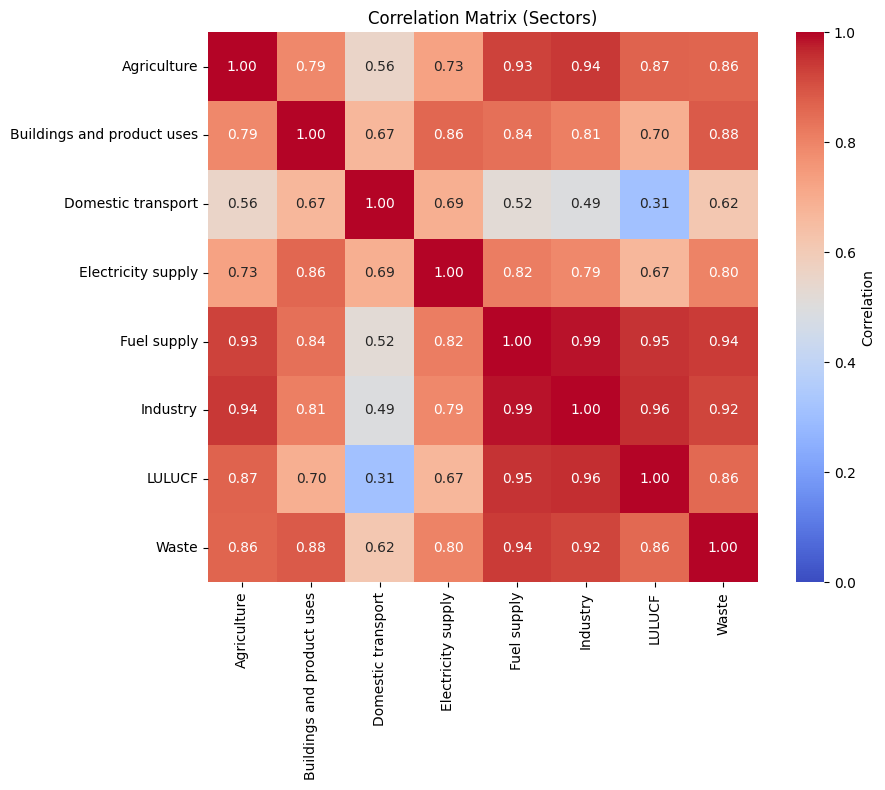

In [11]:
# --- Covariance matrix heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cov_matrix.astype(float),
    ax=ax,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    square=True,
    cbar_kws={"label": "Covariance"}
)
ax.set_title("Covariance Matrix (Sectors)")
plt.tight_layout()
plt.show()

# --- Correlation matrix heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Sectors)")
plt.tight_layout()
plt.show()

Compute year-over-year differenced correlation to strip out the shared downward trend.

In [12]:
# --- Step 6: Year-over-year differenced correlation ---
# Strips out shared downward trend to show actual short-term co-movement

diff = pivot.diff().dropna()

diff_corr = pd.DataFrame(index=sectors, columns=sectors, dtype=float)

for s1 in sectors:
    for s2 in sectors:
        diff_corr.loc[s1, s2] = correlation(diff[s1].values, diff[s2].values)

print("Correlation matrix (year-over-year changes):")
display(diff_corr.round(3))

Correlation matrix (year-over-year changes):


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,1.000,0.261,0.251,-0.101,-0.069,0.238,-0.185,-0.014
Buildings and product uses,0.261,1.000,0.033,0.389,0.044,0.205,-0.017,-0.049
Domestic transport,0.251,0.033,1.000,0.114,0.069,0.125,-0.094,0.180
Electricity supply,-0.101,0.389,0.114,1.000,-0.178,0.317,-0.098,-0.117
Fuel supply,-0.069,0.044,0.069,-0.178,1.000,-0.001,-0.049,0.244
Industry,0.238,0.205,0.125,0.317,-0.001,1.000,-0.043,0.055
LULUCF,-0.185,-0.017,-0.094,-0.098,-0.049,-0.043,1.000,-0.051
Waste,-0.014,-0.049,0.180,-0.117,0.244,0.055,-0.051,1.000


Visualise the differenced correlation matrix.

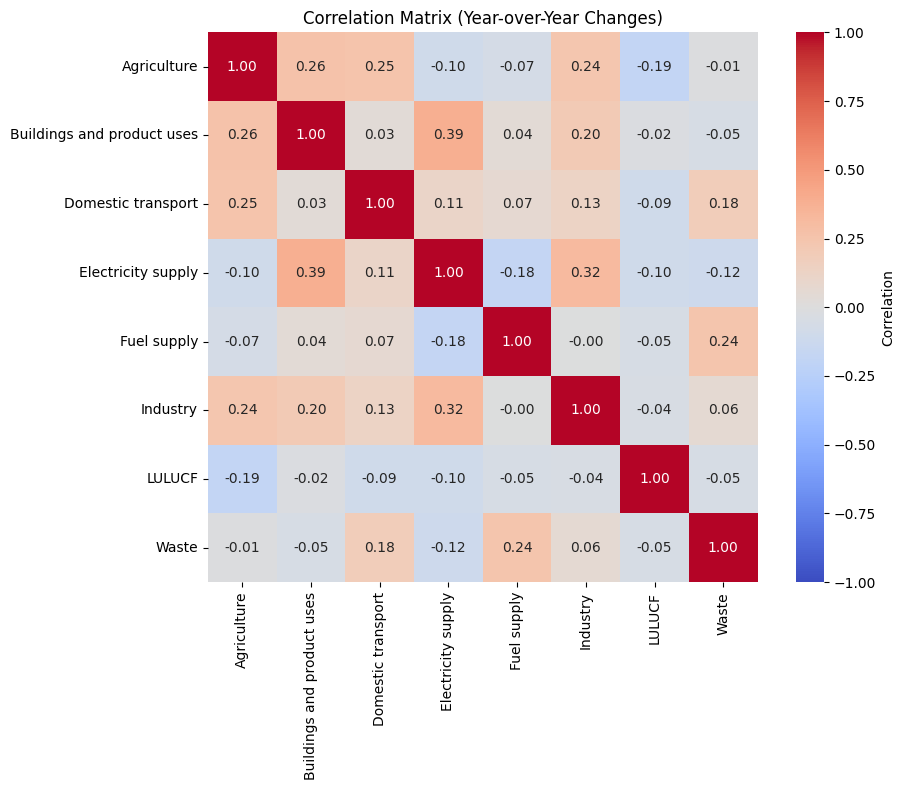

In [13]:
# --- Differenced correlation heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    diff_corr.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Year-over-Year Changes)")
plt.tight_layout()
plt.show()

Plot each sector's emission trajectory over time.

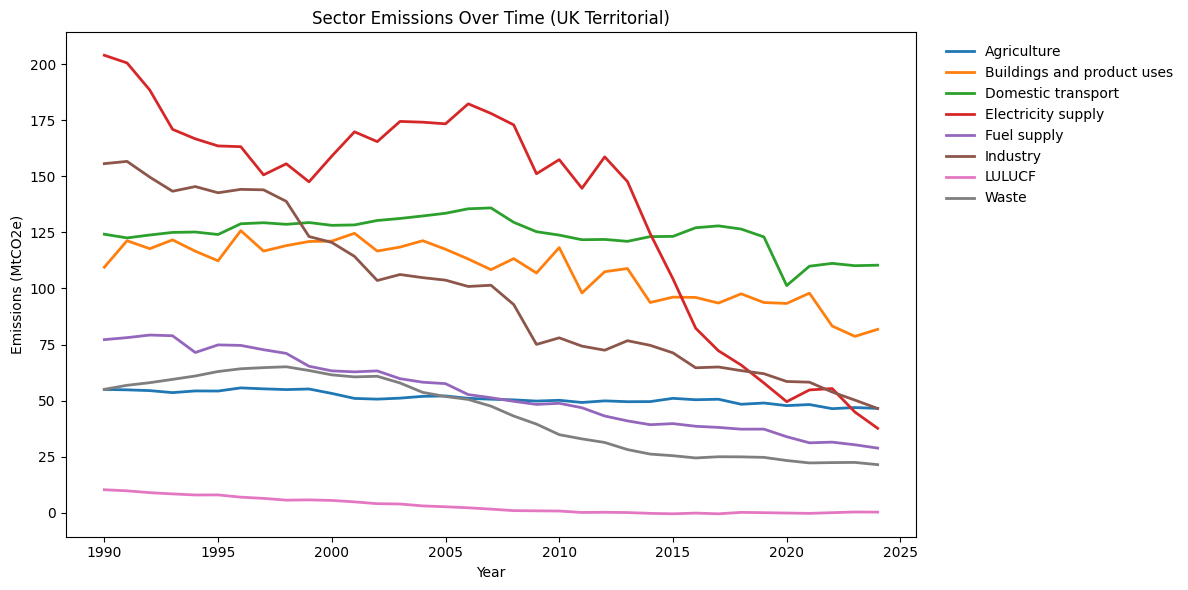

In [14]:
# --- Sector emission trajectories over time ---
fig, ax = plt.subplots(figsize=(12, 6))
for sector in pivot.columns:
    ax.plot(pivot.index, pivot[sector], linewidth=2, label=sector)
ax.set_title("Sector Emissions Over Time (UK Territorial)")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

Boxplot of year-over-year emission changes by sector to show volatility.

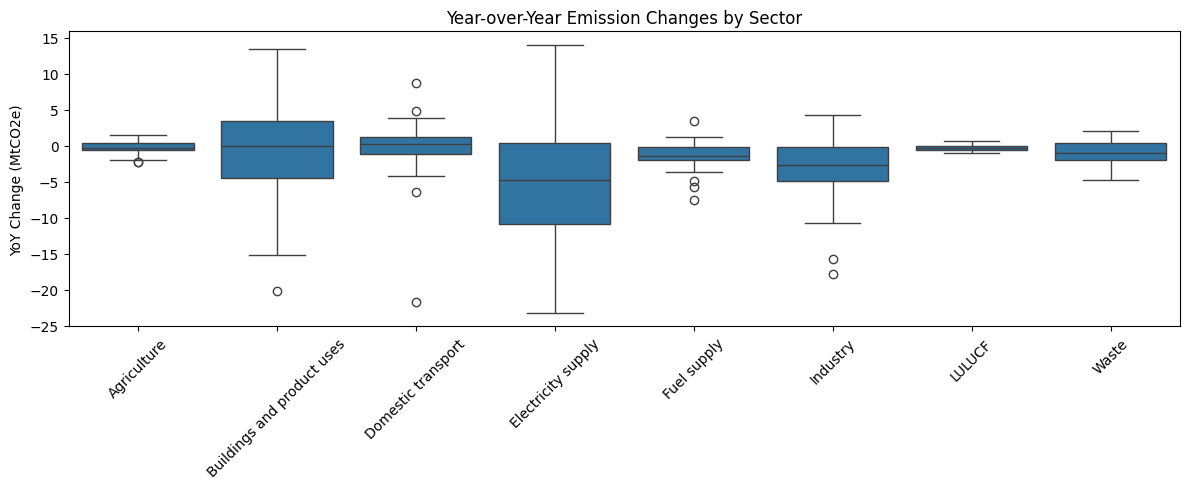

In [15]:
# --- Boxplot of year-over-year changes by sector ---
yoy = pivot.diff().dropna()
yoy_long = yoy.reset_index().melt(id_vars="Year", var_name="Sector", value_name="YoY Change")

fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=yoy_long, x="Sector", y="YoY Change", ax=ax)
ax.set_title("Year-over-Year Emission Changes by Sector")
ax.set_ylabel("YoY Change (MtCO2e)")
ax.set_xlabel("")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

Compare YoY change distributions for a volatile sector (Electricity) vs a stable one (Agriculture).

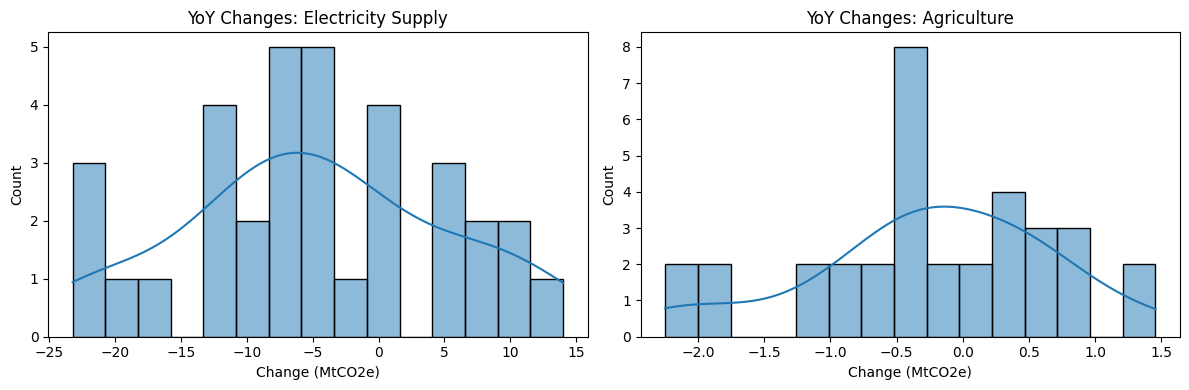

In [16]:
# --- Histograms for contrasting sectors ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(yoy["Electricity supply"], bins=15, kde=True, ax=axes[0], alpha=0.5)
axes[0].set_title("YoY Changes: Electricity Supply")
axes[0].set_xlabel("Change (MtCO2e)")

sns.histplot(yoy["Agriculture"], bins=15, kde=True, ax=axes[1], alpha=0.5)
axes[1].set_title("YoY Changes: Agriculture")
axes[1].set_xlabel("Change (MtCO2e)")

plt.tight_layout()
plt.show()

Measure how strongly each sector's emissions correlate with time.

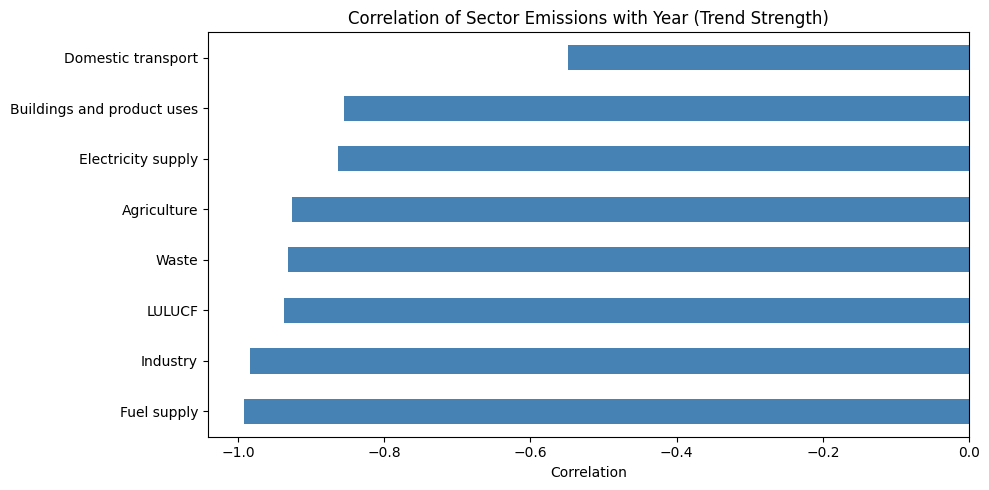

In [17]:
# --- Correlation with Year (trend strength) ---
years = pivot.index.values
corr_with_year = pd.Series({
    s: correlation(years, pivot[s].values) for s in sectors
}).sort_values()

fig, ax = plt.subplots(figsize=(10, 5))
corr_with_year.plot(kind="barh", ax=ax, color="steelblue")
ax.set_title("Correlation of Sector Emissions with Year (Trend Strength)")
ax.set_xlabel("Correlation")
ax.axvline(x=0, color="black", linewidth=0.5)
plt.tight_layout()
plt.show()

Aggregate and pivot emissions by fuel group.

In [18]:
# --- Fuel group aggregation and pivot ---
FUEL_COL = "Fuel group"

fuel_year = (
    territorial
    .groupby(["Year", FUEL_COL], as_index=False)["Emissions (MtCO2e)"]
    .sum()
)

pivot_fuel = (
    fuel_year
    .pivot(index="Year", columns=FUEL_COL, values="Emissions (MtCO2e)")
    .fillna(0.0)
    .sort_index()
)

print("Shape:", pivot_fuel.shape)
pivot_fuel.head()

Shape: (35, 5)


Fuel group,Coal,Gaseous fuels,Other emissions,Other solid fuels,Petroleum
Year,,,,,
1990,221.201645,148.464106,209.842656,14.814075,196.501615
1991,223.790559,156.244617,209.894152,14.290065,196.343011
1992,209.220581,155.377805,205.279474,14.959005,195.535798
1993,179.702582,170.932214,200.649420,15.055283,195.013564
1994,167.372512,179.496265,197.686335,13.784836,190.310669


Compute covariance and correlation matrices for fuel groups.

In [19]:
# --- Fuel group covariance and correlation matrices ---
fuels = pivot_fuel.columns.tolist()

fuel_cov = pd.DataFrame(index=fuels, columns=fuels, dtype=float)
fuel_corr = pd.DataFrame(index=fuels, columns=fuels, dtype=float)

for f1 in fuels:
    for f2 in fuels:
        fuel_cov.loc[f1, f2] = covariance(pivot_fuel[f1].values, pivot_fuel[f2].values)
        fuel_corr.loc[f1, f2] = correlation(pivot_fuel[f1].values, pivot_fuel[f2].values)

print("Fuel group covariance matrix:")
display(fuel_cov.round(3))

print("Fuel group correlation matrix:")
display(fuel_corr.round(3))

Fuel group covariance matrix:


,Coal,Gaseous fuels,Other emissions,Other solid fuels,Petroleum
Coal,3917.102,428.820,2213.511,157.741,1187.251
Gaseous fuels,428.820,1069.786,265.966,16.078,188.217
Other emissions,2213.511,265.966,1744.500,111.878,837.594
Other solid fuels,157.741,16.078,111.878,7.662,55.485
Petroleum,1187.251,188.217,837.594,55.485,446.215


Fuel group correlation matrix:


,Coal,Gaseous fuels,Other emissions,Other solid fuels,Petroleum
Coal,1.000,0.209,0.847,0.911,0.898
Gaseous fuels,0.209,1.000,0.195,0.178,0.272
Other emissions,0.847,0.195,1.000,0.968,0.949
Other solid fuels,0.911,0.178,0.968,1.000,0.949
Petroleum,0.898,0.272,0.949,0.949,1.000


Visualise fuel group correlation matrix.

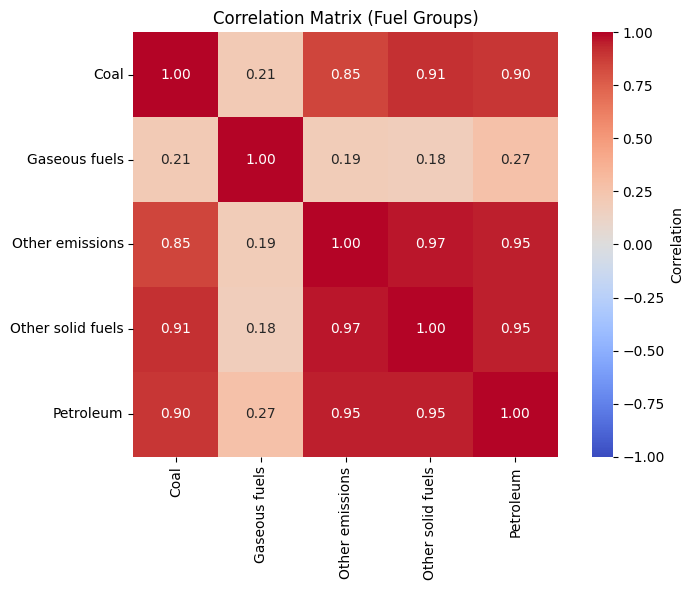

In [20]:
# --- Fuel group correlation heatmap ---
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    fuel_corr.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Fuel Groups)")
plt.tight_layout()
plt.show()

Plot fuel group emission trajectories over time.

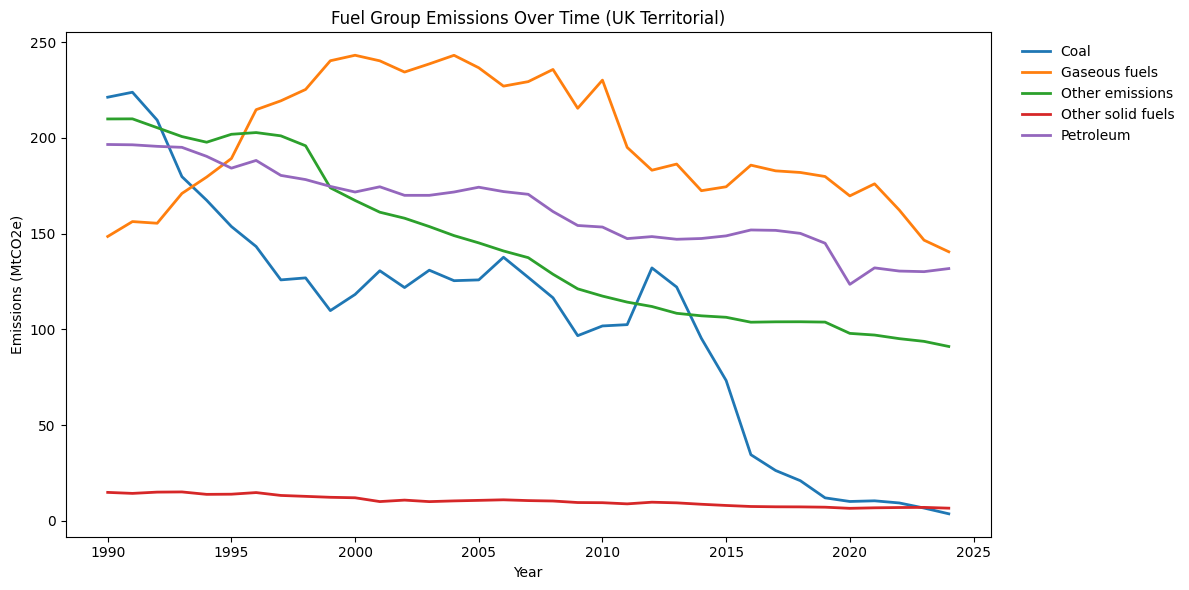

In [21]:
# --- Fuel group trajectories over time ---
fig, ax = plt.subplots(figsize=(12, 6))
for fuel in pivot_fuel.columns:
    ax.plot(pivot_fuel.index, pivot_fuel[fuel], linewidth=2, label=fuel)
ax.set_title("Fuel Group Emissions Over Time (UK Territorial)")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

Measure trend strength for each fuel group.

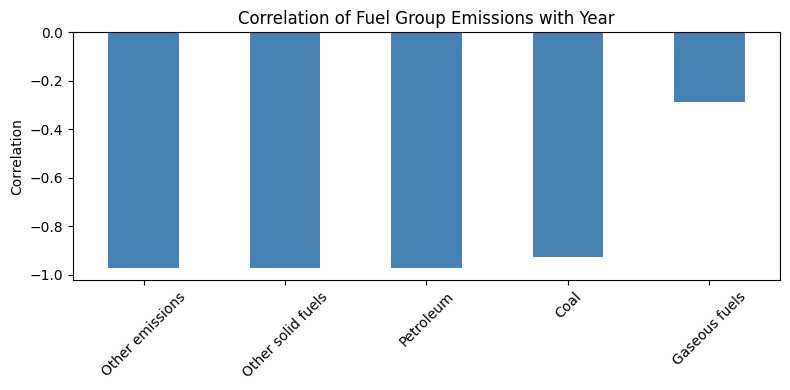

In [22]:
# --- Fuel group correlation with Year ---
fuel_corr_year = pd.Series({
    f: correlation(years, pivot_fuel[f].values) for f in fuels
}).sort_values()

fig, ax = plt.subplots(figsize=(8, 4))
fuel_corr_year.plot(kind="bar", ax=ax, color="steelblue")
ax.set_title("Correlation of Fuel Group Emissions with Year")
ax.set_ylabel("Correlation")
ax.axhline(y=0, color="black", linewidth=0.5)
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

### Interpretation of Observed Emission Patterns

**Sector-level analysis.** All sector pairs show positive covariance and correlation in levels, driven by a shared downward trend since 1990. Covariance is dominated by Electricity supply and Industry due to their scale, illustrating its dependence on magnitude. Correlation normalises for this: Fuel supply, Industry, LULUCF, and Waste form a tightly correlated group (r > 0.85), while Domestic transport is the outlier (r = 0.31 to 0.69), declining far more slowly.

**Differenced correlation.** Once the shared trend (all sectors declining against time) is removed, nearly all pairwise correlations drop to near zero, meaning sectors fluctuate independently in the short term. The high level correlations are largely a trend artifact.

**Visualised patterns.** Electricity supply shows the largest absolute reduction (~204 to below 100 MtCO2e) and highest year-to-year volatility. Domestic transport stayed roughly flat until the mid-2010s (r = -0.55 with Year vs -0.99 for Fuel supply). Agriculture and LULUCF are the most stable sectors.

**Fuel groups.** Coal, Petroleum, Other emissions, and Other solid fuels are strongly correlated (r > 0.85), reflecting a broad fossil fuel decline. Gaseous fuels is the exception (r < 0.3 with all others), having risen through the 2000s as a coal replacement before declining recently.

# Question 2
## Cluster Analysis
Cluster analysis is used to group data points based on similarity in their attributes.
1. Choose one clustering algorithm discussed in the lectures and apply it to group emission sources
or activities based on their emission trajectories over time.
2. Clearly justify the variables used for clustering (e.g., emission levels, rate of change, fuel group).
Interpret the resulting clusters and explain what they reveal about structural changes in UK
greenhouse gas emissions.
3. Relate your clustering results to UK climate policy by identifying which clusters align with
sectorstargeted under UK Carbon Budgets and which sectors appear more resistant to emission
reductions.

Import clustering tools.

In [23]:
# --- Q2: Cluster emission subsectors by trajectory ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Build subsector-level time series and transpose so each row is a subsector.

In [24]:
# --- Subsector time series ---
SUB_COL = "Territorial Emissions Statistics subsector"

sub_year = (
    territorial
    .groupby(["Year", SUB_COL], as_index=False)["Emissions (MtCO2e)"]
    .sum()
)

pivot_sub = (
    sub_year
    .pivot(index="Year", columns=SUB_COL, values="Emissions (MtCO2e)")
    .fillna(0.0)
    .sort_index()
)

# Transpose so rows = subsectors, columns = years
X = pivot_sub.T
print("Shape:", X.shape)
X.head()

Shape: (27, 35)


Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Territorial Emissions Statistics subsector,,,,,,,,,,,,,,,,,,,,,
Agricultural combustion,4.325499,4.499649,4.668857,4.424387,4.450208,4.574767,4.979039,4.690097,4.555080,5.043046,...,6.575694,6.380964,6.332409,4.798576,5.104755,5.224523,5.140008,4.144526,5.201700,5.855751
Agricultural soils,14.526131,14.623143,13.924617,13.348997,13.923282,13.984590,14.239490,14.318589,14.054559,14.080221,...,12.808333,12.496116,12.650881,12.523147,12.763325,11.896074,12.302954,11.593226,11.693428,11.093132
Bioenergy crops,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.006565,-0.012377,-0.015531,-0.003829,-0.021312,-0.008765,-0.016776,-0.010148,-0.028153,0.001828
Civil aviation,1.494801,1.509820,1.509616,1.480041,1.378973,1.462233,1.616538,1.641061,1.732712,1.938997,...,1.529931,1.467114,1.563166,1.426500,1.341422,0.571256,0.762536,1.071080,1.132249,1.182713
Commercial buildings,12.473368,14.381214,13.103239,14.030387,13.713749,14.216497,15.177762,13.423471,14.580264,15.925649,...,12.784026,12.458749,11.937840,14.073720,13.346142,13.134891,14.118867,13.208619,12.693438,13.354014


Standardise trajectories so K-Means isn't dominated by scale differences.

In [25]:
# --- Scale trajectories ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Use elbow method and silhouette score to determine optimal k.

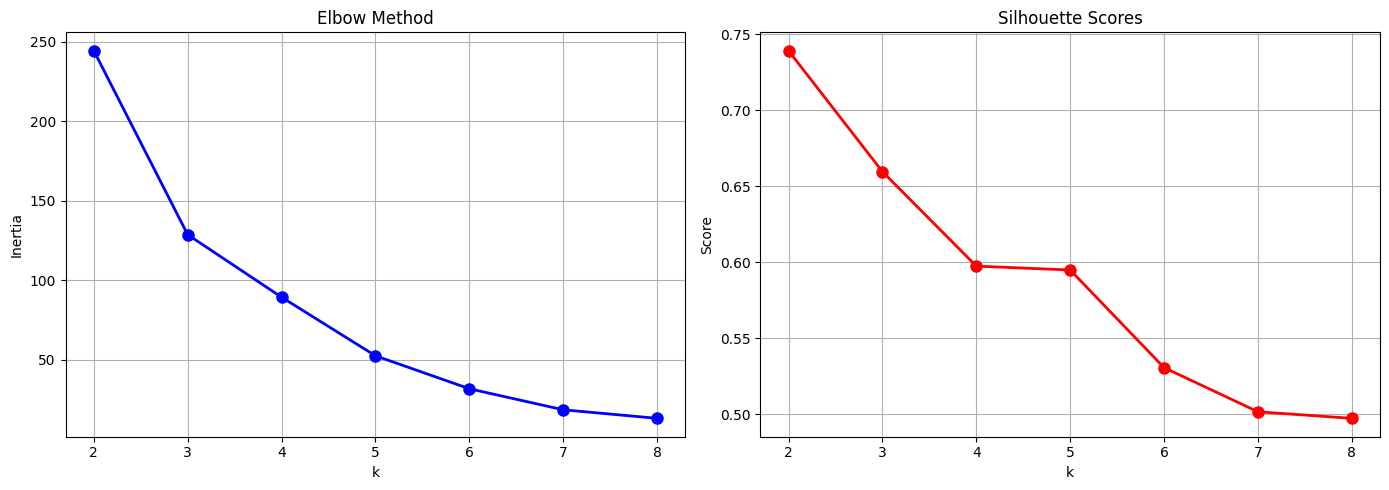

In [26]:
# --- Elbow and silhouette ---
inertias = []
silhouettes = []
k_range = range(2, 9)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(list(k_range), inertias, "bo-", linewidth=2, markersize=8)
axes[0].set_title("Elbow Method")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

axes[1].plot(list(k_range), silhouettes, "ro-", linewidth=2, markersize=8)
axes[1].set_title("Silhouette Scores")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Score")
axes[1].grid(True)

plt.tight_layout()
plt.show()

Run K-Means with k=3 and assign cluster labels.

In [27]:
# --- Run K-Means (adjust k after seeing plots) ---
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# Assign clusters
cluster_map = pd.Series(labels, index=X.index, name="cluster")

for c in range(k):
    members = cluster_map[cluster_map == c].index.tolist()
    print(f"\nCluster {c} ({len(members)} subsectors):")
    for m in members:
        print(f"  - {m}")


Cluster 0 (20 subsectors):
  - Agricultural combustion
  - Agricultural soils
  - Bioenergy crops
  - Civil aviation
  - Commercial buildings
  - Cropland mineral soils change
  - Forestry
  - Grassland mineral soils change
  - Industrial processes
  - Other LULUCF
  - Other agriculture
  - Other buildings and product uses
  - Other domestic transport
  - Other industry
  - Peatland
  - Public sector buildings
  - Railways
  - Settlement
  - Solid fuel supply
  - Waterborne

Cluster 1 (2 subsectors):
  - Power stations
  - Road

Cluster 2 (5 subsectors):
  - Industrial fuel combustion
  - Livestock
  - Oil and gas supply
  - Residential buildings
  - Waste


Plot individual subsector trajectories coloured by cluster with cluster averages overlaid.

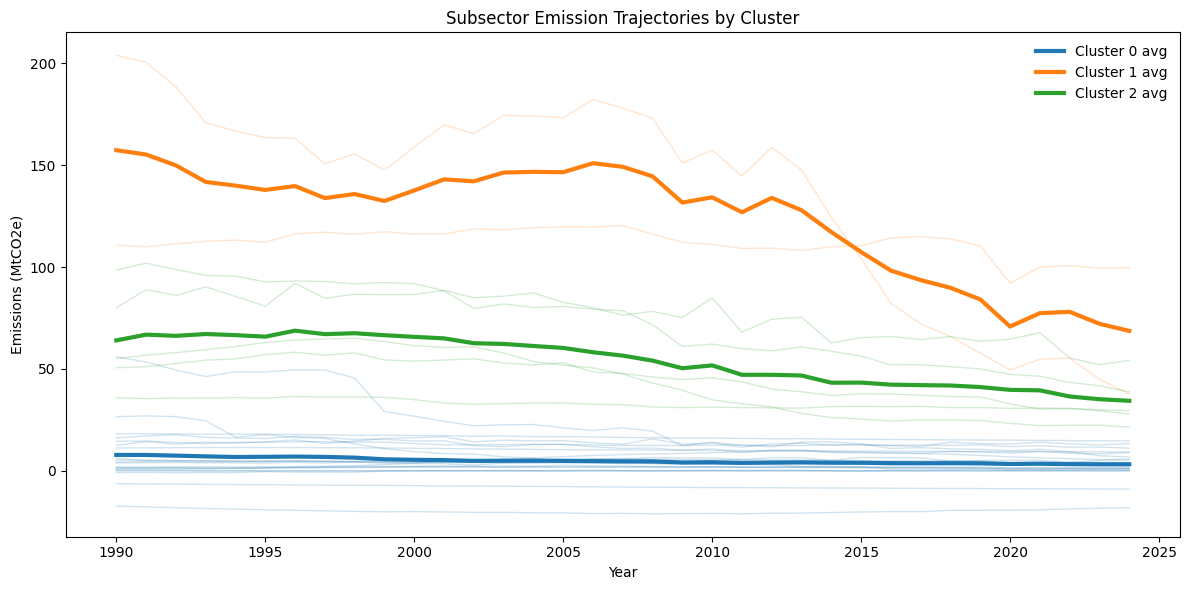

In [28]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

fig, ax = plt.subplots(figsize=(12, 6))
for c in range(k):
    members = cluster_map[cluster_map == c].index.tolist()
    for m in members:
        ax.plot(pivot_sub.index, pivot_sub[m], color=colors[c], alpha=0.20, linewidth=1)
    ax.plot(pivot_sub.index, pivot_sub[members].mean(axis=1),
            color=colors[c], linewidth=3, label=f"Cluster {c} avg")

ax.set_title("Subsector Emission Trajectories by Cluster")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

Summarise each cluster's size, 1990 baseline, 2024 level, and percentage change.

In [29]:
# --- Cluster summary ---
summary = pd.DataFrame(index=range(k))
for c in range(k):
    members = cluster_map[cluster_map == c].index.tolist()
    summary.loc[c, "n_subsectors"] = len(members)
    summary.loc[c, "avg_1990"] = pivot_sub[members].iloc[0].mean()
    summary.loc[c, "avg_latest"] = pivot_sub[members].iloc[-1].mean()
    summary.loc[c, "avg_pct_change"] = (
        (pivot_sub[members].iloc[-1].mean() - pivot_sub[members].iloc[0].mean())
        / abs(pivot_sub[members].iloc[0].mean()) * 100
    )

display(summary.round(2))

,n_subsectors,avg_1990,avg_latest,avg_pct_change
0,20.0,7.80,3.21,-58.85
1,2.0,157.39,68.69,-56.36
2,5.0,64.02,34.37,-46.31


### Q2: Cluster Analysis - Interpretation

**Variable justification (Q2.2).** We cluster the 27 subsectors directly on their 35-year emission trajectories (1990-2024), scaled with StandardScaler. This captures the full shape of each time series rather than relying on summary statistics. Scaling is necessary because subsector emissions range from near-zero (Bioenergy crops) to over 180 MtCO2e (Power stations), and without it K-Means would simply separate large from small emitters. We select k=3 based on the elbow at k=3 in the inertia plot and a strong silhouette score of 0.66.

**Cluster interpretation.** Cluster 1 (Power stations, Road transport) contains the two dominant emitters, averaging 157 MtCO2e in 1990 with a 56% reduction by 2024. Cluster 2 (Industrial fuel combustion, Livestock, Oil and gas supply, Residential buildings, Waste) captures mid-sized emitters averaging 64 MtCO2e in 1990, with the slowest decline at 46%. Cluster 0 groups the remaining 20 small subsectors (avg 7.8 MtCO2e in 1990), collectively down 59%.

**Policy relevance (Q2.3).** Cluster 1 aligns with the sectors most directly targeted by UK Carbon Budgets: coal phase-out drove the steep Power stations decline, while Road transport is a key focus of the sixth Carbon Budget through EV adoption. Cluster 2 represents the "harder to abate" sectors. Livestock and Industrial combustion require process-level changes rather than fuel switching, and Residential buildings depend on the slow rollout of heat pumps. Their 46% decline, the weakest of all three clusters, flags these as the main risk to meeting future carbon budgets. Cluster 0's broad-based 59% reduction suggests structural decarbonisation is occurring across the wider economy, even among individually minor sources.

# Question 3
## Policy Interpretation and Critical Analysis
1. Using the column Included in UK territorial total, compare emission trends with and
without international aviation and shipping. Discuss how this distinction affects progress as-
sessment against UK Carbon Budgets.
2. Using the Included in UK Paris Agreement total indicator,identify which emission sources
are covered under the UK’s Paris Agreement reporting. Explain the implications of this coverage
for interpreting national emission reduction performance.
3. Based on your data-driven findings, critically assess whether historical emission trends suggest
that the UK is structurally aligned with its long-term climate targets. Support your answer with
quantitative evidence from your analysis.

Separate territorial from non-territorial emissions to identify what's excluded.

In [30]:
# --- Q3.1: Territorial vs including international aviation/shipping ---

# Territorial only (already have this)
terr_by_year = territorial.groupby("Year")["Emissions (MtCO2e)"].sum()

# All emissions (including non-territorial)
all_by_year = df.groupby("Year")["Emissions (MtCO2e)"].sum()

# What's excluded from territorial?
non_terr = df[df["Included in UK territorial total"].str.lower() != "yes"]
print("Non-territorial unique sectors:")
print(non_terr["Territorial Emissions Statistics sector"].unique())
print(f"\nNon-territorial rows: {len(non_terr)}")
non_terr_by_year = non_terr.groupby("Year")["Emissions (MtCO2e)"].sum()

Non-territorial unique sectors:
<StringArray>
['International aviation and shipping']
Length: 1, dtype: str

Non-territorial rows: 2363


Compare territorial vs total emission trends.

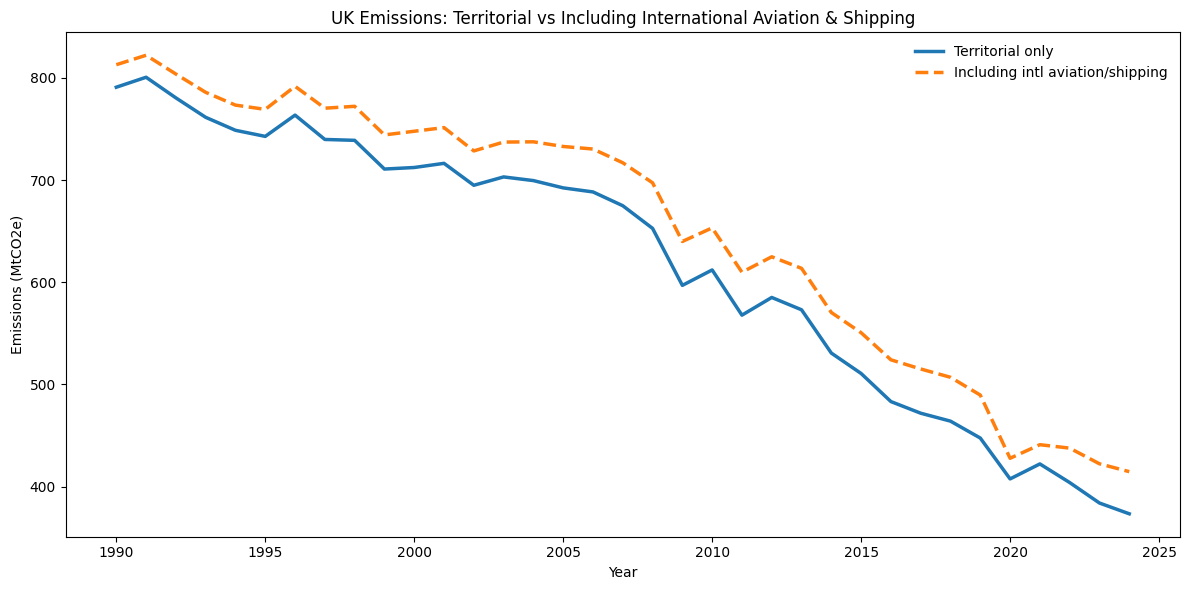

In [31]:
# --- Plot: territorial vs total ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(terr_by_year.index, terr_by_year.values, linewidth=2.5, label="Territorial only")
ax.plot(all_by_year.index, all_by_year.values, linewidth=2.5, label="Including intl aviation/shipping", linestyle="--")
ax.set_title("UK Emissions: Territorial vs Including International Aviation & Shipping")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

Show cumulative percentage change from 1990 for both measures.

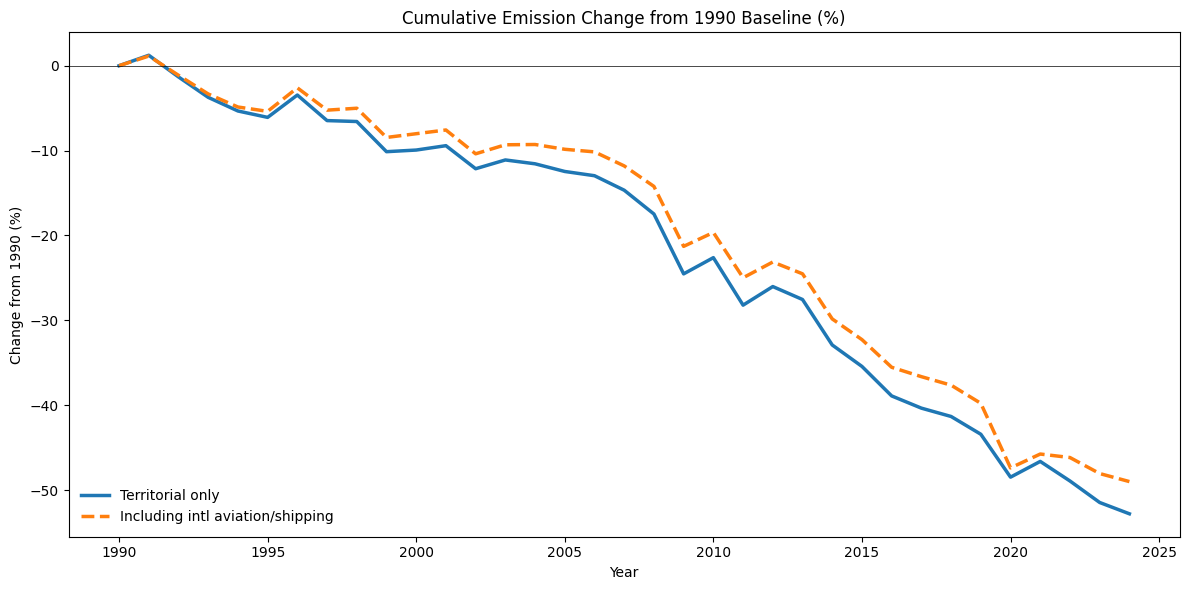

Territorial reduction by 2024: -52.8%
Total (incl intl) reduction by 2024: -49.0%
Gap: 3.8 percentage points


In [32]:
# --- Percentage change from 1990 baseline for both ---
terr_pct = (terr_by_year / terr_by_year.iloc[0] - 1) * 100
all_pct = (all_by_year / all_by_year.iloc[0] - 1) * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(terr_pct.index, terr_pct.values, linewidth=2.5, label="Territorial only")
ax.plot(all_pct.index, all_pct.values, linewidth=2.5, label="Including intl aviation/shipping", linestyle="--")
ax.axhline(y=0, color="black", linewidth=0.5)
ax.set_title("Cumulative Emission Change from 1990 Baseline (%)")
ax.set_xlabel("Year")
ax.set_ylabel("Change from 1990 (%)")
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

print(f"Territorial reduction by 2024: {terr_pct.iloc[-1]:.1f}%")
print(f"Total (incl intl) reduction by 2024: {all_pct.iloc[-1]:.1f}%")
print(f"Gap: {abs(terr_pct.iloc[-1]) - abs(all_pct.iloc[-1]):.1f} percentage points")

Plot international aviation and shipping emissions separately.

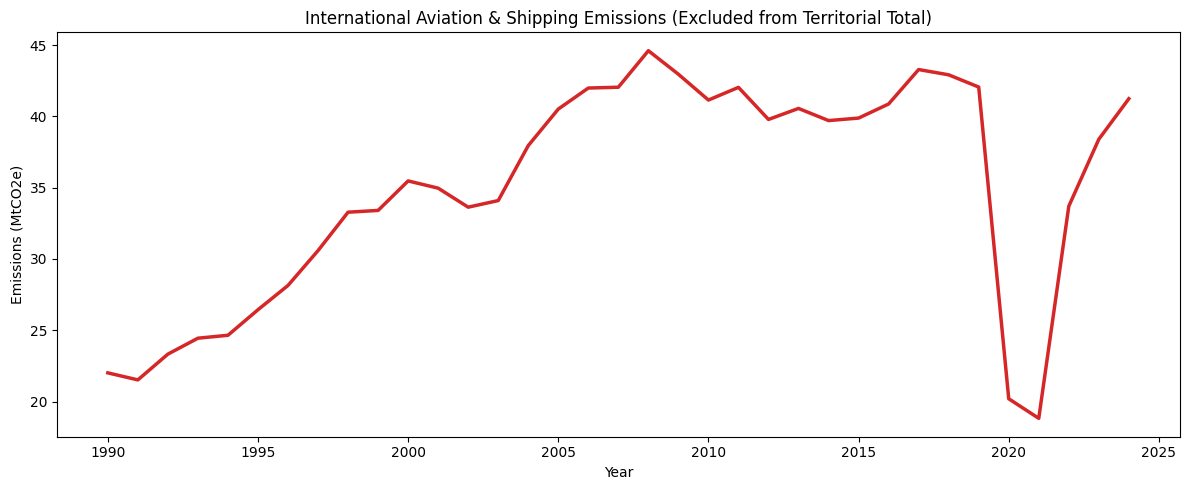

In [33]:
# --- Non-territorial emissions over time ---
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(non_terr_by_year.index, non_terr_by_year.values, linewidth=2.5, color="tab:red")
ax.set_title("International Aviation & Shipping Emissions (Excluded from Territorial Total)")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
plt.tight_layout()
plt.show()

Load the UNFCCC sheet which contains the Paris Agreement indicator.

In [34]:
# --- Q3.2: Paris Agreement coverage ---
unfccc = pd.read_excel("Data/greenhouse-gas-emissions.xlsx", sheet_name=3)

print("Unique values in Paris Agreement column:")
print(unfccc["Included in UK Paris Agreement total"].unique())

Unique values in Paris Agreement column:
<StringArray>
['No', 'Yes']
Length: 2, dtype: str


Split emissions by Paris Agreement coverage and identify excluded sectors.

In [35]:
# Paris-covered vs not
paris_yes = unfccc[unfccc["Included in UK Paris Agreement total"].str.lower() == "yes"]
paris_no = unfccc[unfccc["Included in UK Paris Agreement total"].str.lower() != "yes"]

paris_by_year = paris_yes.groupby("Year")["Emissions (MtCO2e)"].sum()
non_paris_by_year = paris_no.groupby("Year")["Emissions (MtCO2e)"].sum()

# What's excluded?
print("Sectors excluded from Paris Agreement reporting:")
excluded_sectors = paris_no.groupby("Territorial Emissions Statistics sector")["Emissions (MtCO2e)"].sum().sort_values()
display(excluded_sectors.round(2))

Sectors excluded from Paris Agreement reporting:


Territorial Emissions Statistics sector
Fuel supply                    0.00
Industry                       0.20
Waste                          3.51
LULUCF                         4.20
Buildings and product uses     6.40
Agriculture                    7.72
Electricity supply            27.55
Domestic transport            28.63
Name: Emissions (MtCO2e), dtype: float64

Compare Paris-covered vs non-covered emission trends.

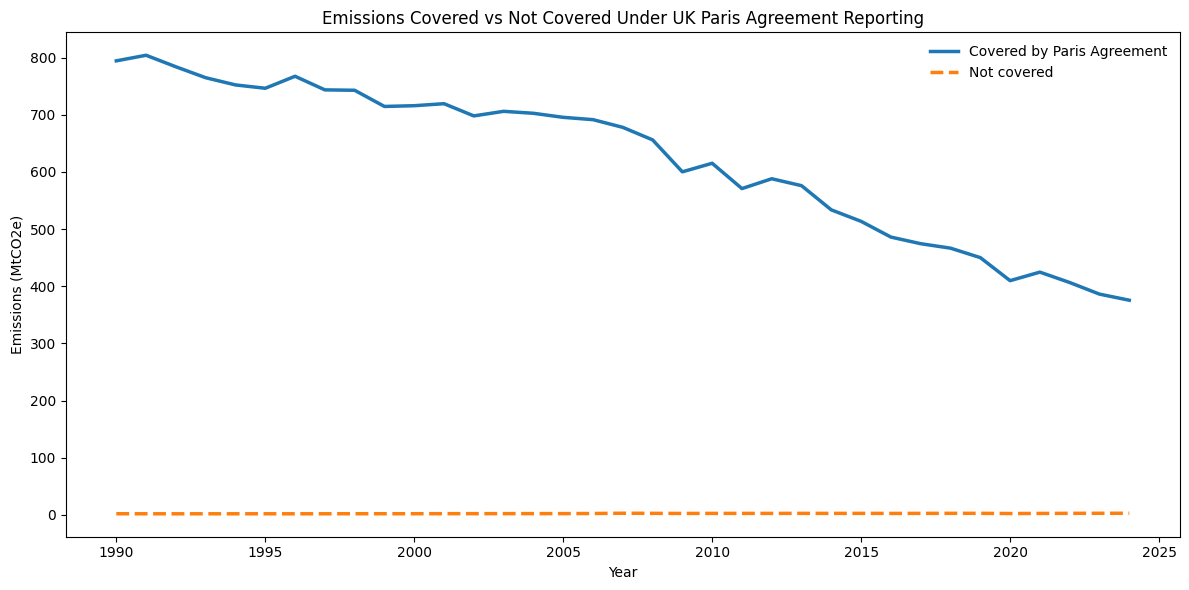

In [36]:
# Update total to use UNFCCC sheet
all_by_year_unfccc = unfccc.groupby("Year")["Emissions (MtCO2e)"].sum()

# --- Plot: Paris vs non-Paris ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(paris_by_year.index, paris_by_year.values, linewidth=2.5, label="Covered by Paris Agreement")
ax.plot(non_paris_by_year.index, non_paris_by_year.values, linewidth=2.5, label="Not covered", linestyle="--")
ax.set_title("Emissions Covered vs Not Covered Under UK Paris Agreement Reporting")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

Show what percentage of total emissions falls under Paris Agreement reporting.

NameError: name 'paris_share' is not defined

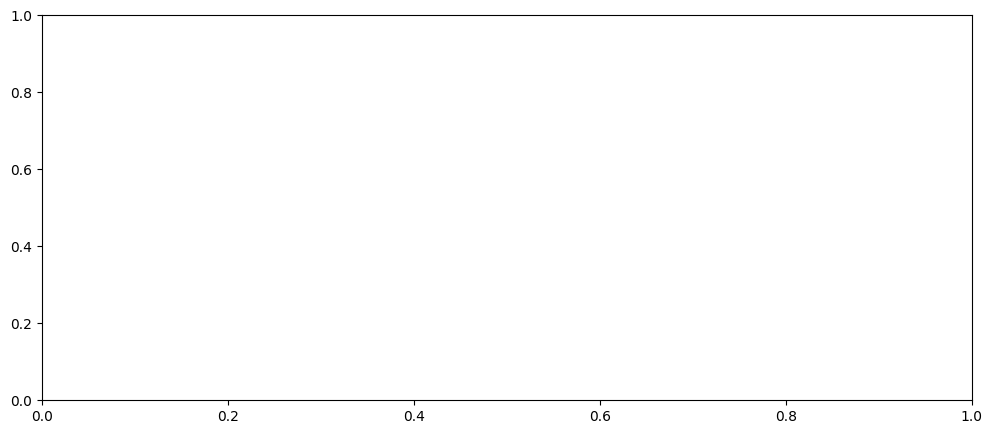

In [37]:
# --- Paris Agreement coverage by year (bar chart) ---
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(paris_share.index, paris_share.values, color="tab:green", alpha=0.7)
ax.set_title("Paris Agreement Coverage by Year (%)")
ax.set_xlabel("Year")
ax.set_ylabel("Coverage (%)")
ax.set_ylim(98, 100)
plt.tight_layout()
plt.show()


print(f"Paris coverage in 1990: {paris_share.iloc[0]:.1f}%")
print(f"Paris coverage in 2024: {paris_share.iloc[-1]:.1f}%")

Break down excluded emissions by subsector.

In [ ]:
# What exactly is excluded from Paris?
print(f"Paris-covered rows: {len(paris_yes)}")
print(f"Not covered rows: {len(paris_no)}")
print()

# Excluded by sector
print("Excluded sources breakdown:")
excluded = paris_no.groupby(["Territorial Emissions Statistics sector", "Territorial Emissions Statistics subsector"])["Emissions (MtCO2e)"].sum().sort_values()
display(excluded.round(2))

Paris-covered rows: 117769
Not covered rows: 28079

Excluded sources breakdown:


Territorial Emissions Statistics sector  Territorial Emissions Statistics subsector
Fuel supply                              Solid fuel supply                              0.00
Industry                                 Other industry                                 0.01
LULUCF                                   Cropland mineral soils change                  0.02
                                         Settlement                                     0.04
Domestic transport                       Other domestic transport                       0.09
LULUCF                                   Other LULUCF                                   0.18
Industry                                 Industrial fuel combustion                     0.19
Buildings and product uses               Commercial buildings                           0.54
                                         Residential buildings                          1.21
LULUCF                                   Forestry                              

Compute total territorial reduction and the 2030 target gap.

In [ ]:
# --- Q3.3: Structural alignment with climate targets ---

# Overall territorial reduction
total_1990 = terr_by_year.iloc[0]
total_2024 = terr_by_year.iloc[-1]
total_pct_reduction = (total_2024 - total_1990) / total_1990 * 100

print(f"Total territorial emissions 1990: {total_1990:.1f} MtCO2e")
print(f"Total territorial emissions 2024: {total_2024:.1f} MtCO2e")
print(f"Total reduction: {total_pct_reduction:.1f}%")
print()

# UK target: 68% reduction by 2030, net zero by 2050
target_2030 = total_1990 * (1 - 0.68)
print(f"Target for 2030 (68% below 1990): {target_2030:.1f} MtCO2e")
print(f"Remaining reduction needed by 2030: {total_2024 - target_2030:.1f} MtCO2e")
print(f"Years remaining: {2030 - 2024}")

Total territorial emissions 1990: 790.8 MtCO2e
Total territorial emissions 2024: 373.4 MtCO2e
Total reduction: -52.8%

Target for 2030 (68% below 1990): 253.1 MtCO2e
Remaining reduction needed by 2030: 120.3 MtCO2e
Years remaining: 6


Compare recent annual reduction rate against what's needed for 2030.

In [ ]:
# --- Recent rate of decline vs required rate ---
# Average annual reduction over last 5 years
recent_years = terr_by_year.loc[2019:2024]
avg_annual_reduction = (recent_years.iloc[-1] - recent_years.iloc[0]) / (2024 - 2019)

# Required annual reduction to hit 2030 target
required_annual = (target_2030 - total_2024) / (2030 - 2024)

print(f"Recent avg annual reduction (2019-2024): {avg_annual_reduction:.1f} MtCO2e/year")
print(f"Required avg annual reduction (2024-2030): {required_annual:.1f} MtCO2e/year")
print(f"Acceleration needed: {required_annual / avg_annual_reduction:.1f}x")

Recent avg annual reduction (2019-2024): -14.8 MtCO2e/year
Required avg annual reduction (2024-2030): -20.1 MtCO2e/year
Acceleration needed: 1.4x


Project emissions forward using recent trend and compare against the 2030 target.

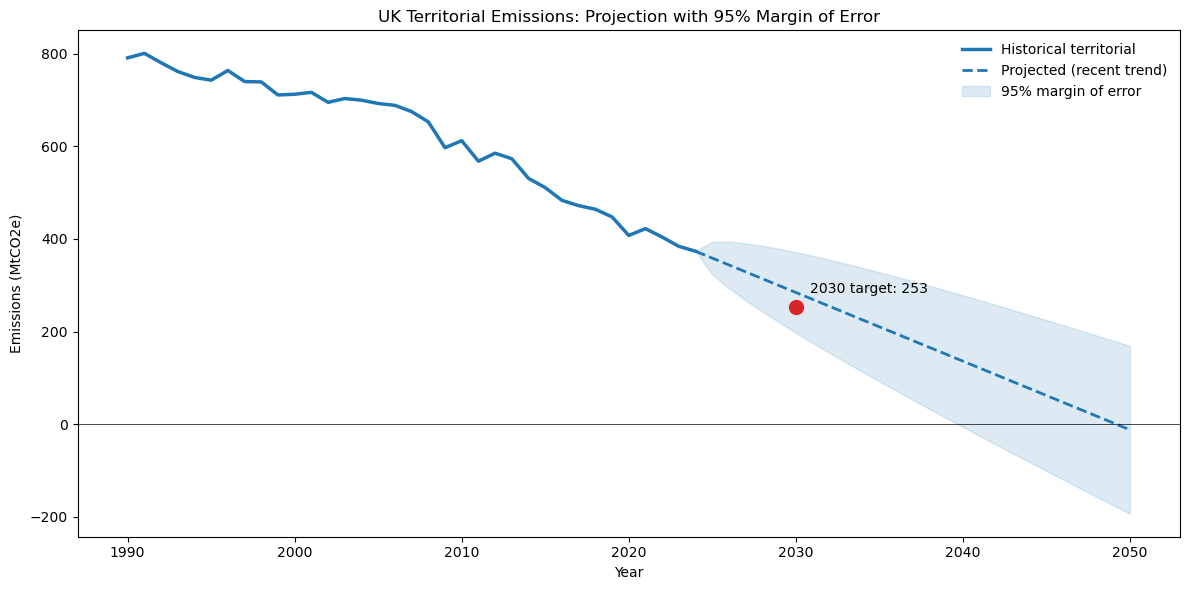

Projected 2030: 284.5 MtCO2e
95% range: 197.5 to 371.5 MtCO2e
2030 target: 253.1 MtCO2e


In [ ]:
# --- Trajectory projection with margin of error ---
fig, ax = plt.subplots(figsize=(12, 6))

# Historical
ax.plot(terr_by_year.index, terr_by_year.values, linewidth=2.5, label="Historical territorial", color="tab:blue")

# Compute margin of error from YoY volatility
yoy_terr = terr_by_year.diff().dropna()
yoy_std = std(yoy_terr.values)

# Linear projection from recent trend
proj_years = np.arange(2024, 2051)
proj_values = total_2024 + avg_annual_reduction * (proj_years - 2024)

# Uncertainty grows with sqrt of years ahead (random walk assumption)
years_ahead = proj_years - 2024
upper = proj_values + 1.96 * yoy_std * np.sqrt(years_ahead)
lower = proj_values - 1.96 * yoy_std * np.sqrt(years_ahead)

ax.plot(proj_years, proj_values, linewidth=2, linestyle="--", color="tab:blue", label="Projected (recent trend)")
ax.fill_between(proj_years, lower, upper, color="tab:blue", alpha=0.15, label="95% margin of error")

# 2030 target
ax.scatter([2030], [target_2030], color="tab:red", s=100, zorder=5)
ax.annotate(f"2030 target: {target_2030:.0f}", (2030, target_2030),
            textcoords="offset points", xytext=(10, 10), fontsize=10)

# Net zero line
ax.axhline(y=0, color="black", linewidth=0.5)
ax.set_title("UK Territorial Emissions: Projection with 95% Margin of Error")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

# Print 2030 range
idx_2030 = 2030 - 2024
print(f"Projected 2030: {proj_values[idx_2030]:.1f} MtCO2e")
print(f"95% range: {lower[idx_2030]:.1f} to {upper[idx_2030]:.1f} MtCO2e")
print(f"2030 target: {target_2030:.1f} MtCO2e")

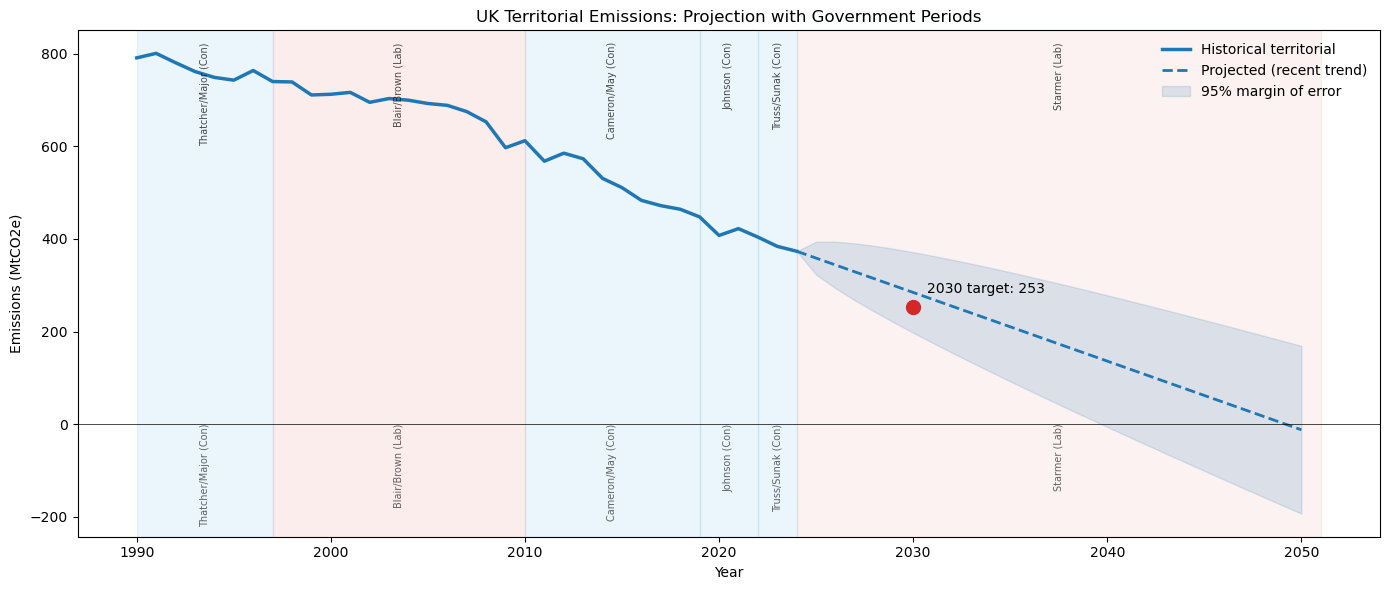

Projected 2030: 284.5 MtCO2e
95% range: 197.5 to 371.5 MtCO2e
2030 target: 253.1 MtCO2e


In [ ]:
# --- Trajectory projection with margin of error + UK government periods ---
fig, ax = plt.subplots(figsize=(14, 6))

# UK governments (party, start_year, end_year, colour)
governments = [
    ("Thatcher/Major (Con)", 1990, 1997, "#0087DC", 0.08),
    ("Blair/Brown (Lab)",    1997, 2010, "#DC241f", 0.08),
    ("Cameron/May (Con)",    2010, 2019, "#0087DC", 0.08),
    ("Johnson (Con)",        2019, 2022, "#0087DC", 0.08),
    ("Truss/Sunak (Con)",    2022, 2024, "#0087DC", 0.08),
    ("Starmer (Lab)",        2024, 2051, "#DC241f", 0.06),
]

for label, y0, y1, col, alpha in governments:
    ax.axvspan(y0, y1, color=col, alpha=alpha)
    mid = (y0 + y1) / 2
    ax.text(mid, ax.get_ylim()[1] if ax.get_ylim()[1] > 0 else 800,
            label, ha="center", va="top", fontsize=7, rotation=90, alpha=0.6)

# Historical
ax.plot(terr_by_year.index, terr_by_year.values, linewidth=2.5,
        label="Historical territorial", color="tab:blue")

# Compute margin of error from YoY volatility
yoy_terr = terr_by_year.diff().dropna()
yoy_std = std(yoy_terr.values)

# Linear projection from recent trend
proj_years = np.arange(2024, 2051)
proj_values = total_2024 + avg_annual_reduction * (proj_years - 2024)

# Uncertainty grows with sqrt of years ahead
years_ahead = proj_years - 2024
upper = proj_values + 1.96 * yoy_std * np.sqrt(years_ahead)
lower = proj_values - 1.96 * yoy_std * np.sqrt(years_ahead)

ax.plot(proj_years, proj_values, linewidth=2, linestyle="--",
        color="tab:blue", label="Projected (recent trend)")
ax.fill_between(proj_years, lower, upper, color="tab:blue", alpha=0.15,
                label="95% margin of error")

# 2030 target
ax.scatter([2030], [target_2030], color="tab:red", s=100, zorder=5)
ax.annotate(f"2030 target: {target_2030:.0f}", (2030, target_2030),
            textcoords="offset points", xytext=(10, 10), fontsize=10)

ax.axhline(y=0, color="black", linewidth=0.5)

# Re-place labels now that y-limits are set
ax.set_title("UK Territorial Emissions: Projection with Government Periods")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False, loc="upper right")
plt.tight_layout()

# Add government labels at top of plot after axes are drawn
y_top = ax.get_ylim()[1] * 0.97
for label, y0, y1, col, alpha in governments:
    mid = (y0 + y1) / 2
    ax.text(mid, y_top, label, ha="center", va="top",
            fontsize=7, rotation=90, alpha=0.7)

plt.show()

idx_2030 = 2030 - 2024
print(f"Projected 2030: {proj_values[idx_2030]:.1f} MtCO2e")
print(f"95% range: {lower[idx_2030]:.1f} to {upper[idx_2030]:.1f} MtCO2e")
print(f"2030 target: {target_2030:.1f} MtCO2e")

### Q3: Policy Interpretation and Critical Analysis

**Q3.1: Territorial vs including international aviation and shipping.** The non-territorial emissions consist entirely of international aviation and shipping (2,363 rows). When these are included, the UK's cumulative reduction from 1990 is smaller than the territorial-only figure of 52.8%, because international aviation and shipping have not declined at the same rate as domestic sources. The territorial measure is the basis for UK Carbon Budget assessments, meaning that Carbon Budget compliance does not capture the full climate impact of UK-linked economic activity. This distinction becomes increasingly material as international air travel recovers post-pandemic.

**Q3.2: Paris Agreement coverage.** The UK's Paris Agreement reporting is near-comprehensive, covering 99.8% of UNFCCC-reported emissions in 1990 and 99.3% in 2024. The excluded fraction (totalling ~78 MtCO2e cumulatively across 35 years) is spread thinly across many subsectors, with the largest excluded portions being Power stations (27.6 MtCO2e), Road (12.8 MtCO2e), and Waterborne transport (12.1 MtCO2e). Because coverage is so broad, UK-reported emission reductions under the Paris Agreement are a reliable representation of actual trends. The more consequential reporting boundary is the territorial distinction identified in Q3.1, not the Paris Agreement scope.

**Q3.3: Structural alignment with long-term climate targets.** UK territorial emissions have fallen 52.8% from 790.8 MtCO2e in 1990 to 373.4 MtCO2e in 2024. To meet the 2030 target of 68% below 1990 (253.1 MtCO2e), the UK must cut a further 120.3 MtCO2e in six years. The recent rate of decline (14.8 MtCO2e/year over 2019-2024) would need to accelerate by a factor of 1.4x to reach this target. While not insurmountable, the challenge is compounded by the composition of remaining emissions. Our Q1 analysis showed Domestic transport has the weakest downward trend (r = -0.55 with Year), and our Q2 clustering identified Livestock, Industrial combustion, Residential buildings, and Waste as the slowest-declining group (46% reduction vs 56-59% for other clusters). These "harder to abate" sectors now make up a growing share of total emissions, meaning each additional unit of reduction is structurally more difficult than the last. The projection plot confirms that extrapolating the 2019-2024 trend falls short of the 2030 target, suggesting additional policy intervention in transport, heating, and agriculture is needed to close the gap.